In [1]:
import numpy as np
from env.gridWorld import GridworldEnv

In [2]:
env = GridworldEnv()
obs_dim = env.nS
action_dim = env.nA
print(f"obs_dim:{obs_dim},action_dim:{action_dim}")

obs_dim:16,action_dim:4


In [3]:
random_policy = np.ones([obs_dim, action_dim]) / action_dim
print(f"random_policy:{random_policy}")

random_policy:[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [4]:
def policy_eval(policy, discount_factor, theta):
    values = np.zeros(obs_dim)
    while True:
        delta = 0
        for obs in range(obs_dim):
            expect_value= 0
            for action, action_prob in enumerate(random_policy[obs]):
                for state_prob, next_state, reward, done in env.P[obs][action]:
                    expect_value += action_prob*state_prob*(reward+discount_factor*values[next_state])
            delta = max(delta, np.abs(expect_value - values[obs]))
            values[obs] = expect_value
        if delta < theta:
            break
    return values

#### 策略评估
+ 定义：已知马尔可夫决策过程和策略$\pi$，计算价值函数$V_{\pi}(s)$的过程
+ 策略评估公式：$V(s) \leftarrow \sum_a \pi(s, a) \sum_{s^{\prime}} \mathcal{P}_{s s^{\prime}}^a\left[\mathcal{R}_{s s^{\prime}}^a+\gamma V\left(s^{\prime}\right)\right]$

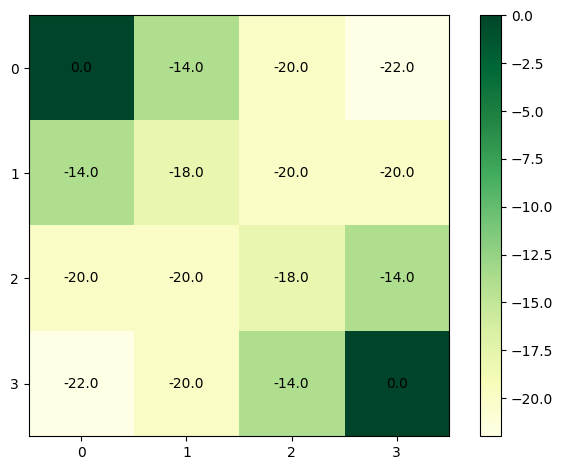

In [5]:
import matplotlib.pyplot as plt

def plot_values(values):  
    fig, ax = plt.subplots()
    ax.set_xticks(range(len(values)))
    ax.set_yticks(range(len(values[0])))
    im = ax.imshow(values, cmap="YlGn")
    plt.colorbar(im)
    
    for i in range(len(values)):
        for j in range(len(values[0])):
            ax.text(j, i, np.round(values[i][j], 1), ha="center", va="center", color="black")
    
    fig.tight_layout()
    plt.show()
    
eval_values = policy_eval(random_policy, 1.0, 1e-5).reshape(env.shape)
plot_values(eval_values)